<h1>Interpolate FC cost term data</h1>

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_FC.csv', converters={'PARTY_ID': str, 'COM_ID': str, 'CNTR_SIZE': str})
df['POD'] = pd.to_datetime(df['POD'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].fillna(-1).astype(int)
df = df.dropna(subset=['ENCODED_TYPE'])
df['RATE'] = df['RATE'].fillna(-1).astype(int)
df = df.dropna(subset=['RATE'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].astype(int)


df.head()
df.info()
print(f'Dataset size: {df.shape}')


,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,POD_ID_EN
0,010,010003678,10003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,FC,675,2,1,4.103561e+09
1,010,010004286,10004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,FC,390,1,1,2.904902e+09
2,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,FC,1615,4,1,2.397848e+09
3,010,01002775,1002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,ECS010060200201,20060306,AUADL,ADELAIDE,2006-03-06,CTNR010060300119,40,HC,FC,700,1,1,2.480737e+08
4,010,01001088,1001088,CARGO LINES S.A.-LE HAVRE,ECS010060200146,20060307,FRMRS,MARSEILLE,2006-03-07,CTNR010060300185,20,GP,FC,675,2,1,4.197227e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54089 entries, 0 to 54088
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54089 non-null  object        
 1   PARTY_ID      54089 non-null  object        
 2   PARTY_ID_EN   54089 non-null  int64         
 3   PARTY_NAME    54089 non-null  object        
 4   CSL_ID        54089 non-null  object        
 5   ETA_ETD_NO    54089 non-null  int64         
 6   ETD_POL_D     54089 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54089 non-null  datetime64[ns]
 9   CNTR_ID       54089 non-null  object        
 10  CNTR_SIZE     54089 non-null  object        
 11  CNTR_TYPE     54089 non-null  object        
 12  COST_TERM     54089 non-null  object        
 13  RATE          54089 non-null  int32         
 14  ENCODED_TYPE  54089 non-null  int32         
 15  ENCODED_TERM  54089 non-null  int64 

<h4>Checking if dataset still contains any NAN values after datacleaning using SQL</h4>

In [49]:
if df.isna().any().any():
    print('Dataframe contains NaN values')
else:
    print('Dataframe does not contain NaN values')

Dataframe contains NaN values


<h4>Removing rows contains NAN values</h4>

In [50]:
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54083 entries, 0 to 54082
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54083 non-null  object        
 1   PARTY_ID      54083 non-null  object        
 2   PARTY_ID_EN   54083 non-null  int64         
 3   PARTY_NAME    54083 non-null  object        
 4   CSL_ID        54083 non-null  object        
 5   ETA_ETD_NO    54083 non-null  int64         
 6   ETD_POL_D     54083 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54083 non-null  datetime64[ns]
 9   CNTR_ID       54083 non-null  object        
 10  CNTR_SIZE     54083 non-null  object        
 11  CNTR_TYPE     54083 non-null  object        
 12  COST_TERM     54083 non-null  object        
 13  RATE          54083 non-null  int32         
 14  ENCODED_TYPE  54083 non-null  int32         
 15  ENCODED_TERM  54083 non-null  int64 

In [51]:
print(df.keys())

Index(['COM_ID', 'PARTY_ID', 'PARTY_ID_EN', 'PARTY_NAME', 'CSL_ID',
       'ETA_ETD_NO', 'ETD_POL_D', 'POD_ID', 'POD', 'CNTR_ID', 'CNTR_SIZE',
       'CNTR_TYPE', 'COST_TERM', 'RATE', 'ENCODED_TYPE', 'ENCODED_TERM',
       'POD_ID_EN'],
      dtype='object')


In [52]:
sel_col = ['COM_ID', 'PARTY_ID', 'PARTY_ID_EN', 'PARTY_NAME', 'CSL_ID',
       'ETA_ETD_NO', 'ETD_POL_D', 'POD_ID', 'POD', 'CNTR_ID', 'CNTR_SIZE',
       'CNTR_TYPE', 'RATE', 'ENCODED_TYPE','POD_ID_EN']

df_fc = df_clean[sel_col]
df_fc.head()
df_fc.info()

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,010,010003678,10003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,675,2,4.103561e+09
1,010,010004286,10004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,390,1,2.904902e+09
2,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,1615,4,2.397848e+09
3,010,01002775,1002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,ECS010060200201,20060306,AUADL,ADELAIDE,2006-03-06,CTNR010060300119,40,HC,700,1,2.480737e+08
4,010,01001088,1001088,CARGO LINES S.A.-LE HAVRE,ECS010060200146,20060307,FRMRS,MARSEILLE,2006-03-07,CTNR010060300185,20,GP,675,2,4.197227e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54083 entries, 0 to 54082
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54083 non-null  object        
 1   PARTY_ID      54083 non-null  object        
 2   PARTY_ID_EN   54083 non-null  int64         
 3   PARTY_NAME    54083 non-null  object        
 4   CSL_ID        54083 non-null  object        
 5   ETA_ETD_NO    54083 non-null  int64         
 6   ETD_POL_D     54083 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54083 non-null  datetime64[ns]
 9   CNTR_ID       54083 non-null  object        
 10  CNTR_SIZE     54083 non-null  object        
 11  CNTR_TYPE     54083 non-null  object        
 12  RATE          54083 non-null  int32         
 13  ENCODED_TYPE  54083 non-null  int32         
 14  POD_ID_EN     54083 non-null  float64       
dtypes: datetime64[ns](1), float64(1), in

In [53]:
# interpolate missing values
df_fc['POD'].dt.year.unique()

array([2006, 2005, 2007, 2008, 2002, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2018, 2019, 2020, 2021, 2016, 2017, 2022, 2023], dtype=int64)

In [54]:
# Sorting by date so can interpolate the missing dates while using cost median 
df_fc = df_fc.sort_values(by='POD').reset_index()
df_fc.head()
df_fc['POD'].dt.year.unique()

,index,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,4666,010,01002799,1002799,GLS INTERFREIGHT CO.LTD,ECS010071200653,20020117,THLKR,LATKRABANG,2002-01-17,CTNR010080100817,20,GP,180,2,2.524904e+09
1,1357,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600224,20050715,NLRTM,ROTTERDAM,2005-07-15,CTNR010050700354,40,HC NOR,1620,4,3.241651e+09
2,2370,010,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,ECS01050600163,20050715,MYPGU,PASIR GUDANG,2005-07-15,CTNR010050700370,40,HC,280,1,3.870912e+09
3,4669,010,01002303,1002303,GLOBELINK FALLOW LIMITED,ECS01050600610,20050715,GBFXT,FELIXSTOWE,2005-07-15,CTNR010050700353,40,GP,1800,2,9.417223e+08
4,4668,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,2005-07-15,CTNR010050700351,40,HC NOR,2170,4,2.397848e+09


array([2002, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

<h3>Interpolate to fill the missing data gap</h3>

<Axes: xlabel='POD'>

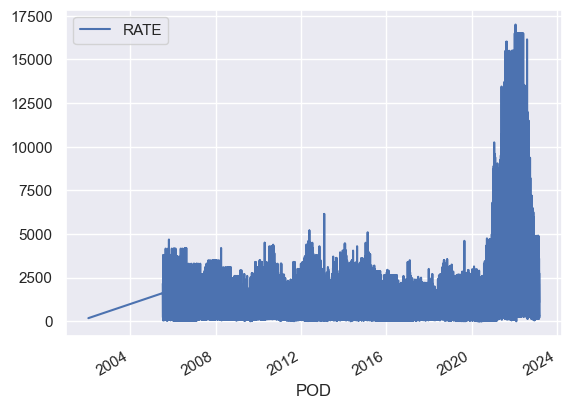

In [55]:
interpolated_data = df_fc.interpolate(method='ffill')
interpolated_data.plot(x='POD', y='RATE')
plt.show()

In [56]:
# Removing rows that contains year 2002
df2 = interpolated_data.loc[interpolated_data['POD'].dt.year != 2002].reset_index(drop=True)
df2.head()
df2.info()

,index,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,1357,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600224,20050715,NLRTM,ROTTERDAM,2005-07-15,CTNR010050700354,40,HC NOR,1620,4,3.241651e+09
1,2370,010,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,ECS01050600163,20050715,MYPGU,PASIR GUDANG,2005-07-15,CTNR010050700370,40,HC,280,1,3.870912e+09
2,4669,010,01002303,1002303,GLOBELINK FALLOW LIMITED,ECS01050600610,20050715,GBFXT,FELIXSTOWE,2005-07-15,CTNR010050700353,40,GP,1800,2,9.417223e+08
3,4668,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,2005-07-15,CTNR010050700351,40,HC NOR,2170,4,2.397848e+09
4,340,010,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,ECS01050600325,20050716,KRPUS,BUSAN,2005-07-16,CTNR010050700379,20,GP,220,2,2.904902e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54082 entries, 0 to 54081
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         54082 non-null  int64         
 1   COM_ID        54082 non-null  object        
 2   PARTY_ID      54082 non-null  object        
 3   PARTY_ID_EN   54082 non-null  int64         
 4   PARTY_NAME    54082 non-null  object        
 5   CSL_ID        54082 non-null  object        
 6   ETA_ETD_NO    54082 non-null  int64         
 7   ETD_POL_D     54082 non-null  object        
 8   POD_ID        54082 non-null  object        
 9   POD           54082 non-null  datetime64[ns]
 10  CNTR_ID       54082 non-null  object        
 11  CNTR_SIZE     54082 non-null  object        
 12  CNTR_TYPE     54082 non-null  object        
 13  RATE          54082 non-null  int32         
 14  ENCODED_TYPE  54082 non-null  int32         
 15  POD_ID_EN     54082 non-null  float6

<Axes: xlabel='POD'>

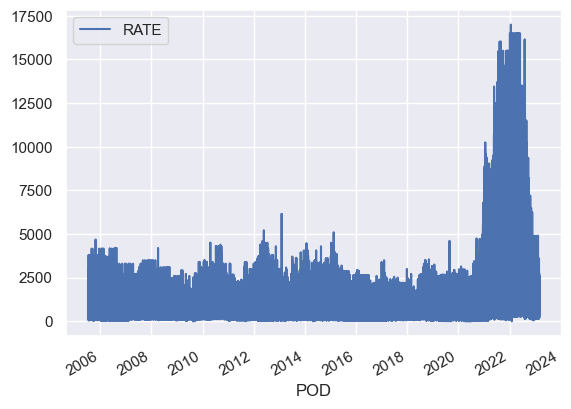

In [57]:
df2.plot(x='POD', y='RATE')
plt.show()

In [58]:
# Checking for negative cost rate
for values in df2['RATE']:
    if values <= 0:
        print(values)

0
0


In [59]:
df3 = df2.loc[df2['RATE'] > 0].reset_index(drop=True)
df3.head()
df3.info()

,index,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,1357,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600224,20050715,NLRTM,ROTTERDAM,2005-07-15,CTNR010050700354,40,HC NOR,1620,4,3.241651e+09
1,2370,010,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,ECS01050600163,20050715,MYPGU,PASIR GUDANG,2005-07-15,CTNR010050700370,40,HC,280,1,3.870912e+09
2,4669,010,01002303,1002303,GLOBELINK FALLOW LIMITED,ECS01050600610,20050715,GBFXT,FELIXSTOWE,2005-07-15,CTNR010050700353,40,GP,1800,2,9.417223e+08
3,4668,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,2005-07-15,CTNR010050700351,40,HC NOR,2170,4,2.397848e+09
4,340,010,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,ECS01050600325,20050716,KRPUS,BUSAN,2005-07-16,CTNR010050700379,20,GP,220,2,2.904902e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54080 entries, 0 to 54079
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         54080 non-null  int64         
 1   COM_ID        54080 non-null  object        
 2   PARTY_ID      54080 non-null  object        
 3   PARTY_ID_EN   54080 non-null  int64         
 4   PARTY_NAME    54080 non-null  object        
 5   CSL_ID        54080 non-null  object        
 6   ETA_ETD_NO    54080 non-null  int64         
 7   ETD_POL_D     54080 non-null  object        
 8   POD_ID        54080 non-null  object        
 9   POD           54080 non-null  datetime64[ns]
 10  CNTR_ID       54080 non-null  object        
 11  CNTR_SIZE     54080 non-null  object        
 12  CNTR_TYPE     54080 non-null  object        
 13  RATE          54080 non-null  int32         
 14  ENCODED_TYPE  54080 non-null  int32         
 15  POD_ID_EN     54080 non-null  float6

(array([8.69871039, 6.3757366 , 8.84379209, ..., 9.36981786, 7.90127367,
       6.46376681]), 0.04298188352348008)


(array([[3.0000e+00, 1.0000e+01, 2.1000e+02, 9.1000e+02, 6.2570e+03,
         1.1116e+04, 1.9105e+04, 1.2197e+04, 2.6440e+03, 1.6280e+03],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([ 0.        ,  1.20972308,  2.41944615,  3.62916923,  4.8388923 ,
         6.04861538,  7.25833845,  8.46806153,  9.6777846 , 10.88750768,
        12.09723075]),
 <a list of 2 BarContainer objects>)

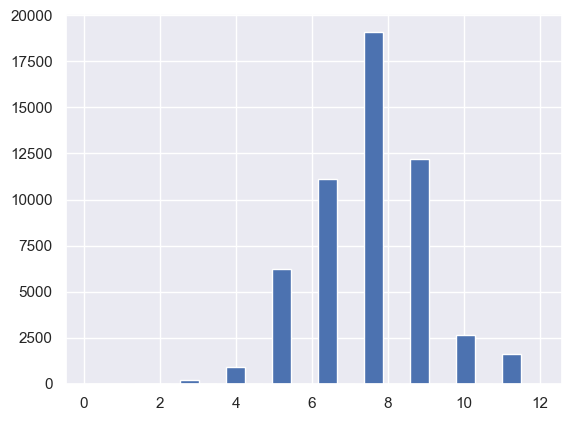

In [60]:
from scipy.stats import boxcox

# Doing symmetric distribution to determine to agg duplicated cost rate on the same date using mean or median
lambda_ = boxcox(df3['RATE'])
print(lambda_)
plt.hist(lambda_, bins=10)
plt.show()

<p>Negatively skewed data, it is usually recommended to use the median as the measure of central tendency instead of the mean. </p>

In [61]:
aggregation = {'RATE': 'median',
               'COM_ID': lambda x: x.iloc[0], 
               'PARTY_ID': lambda x: x.iloc[0], 
               'PARTY_ID_EN': lambda x: x.iloc[0], 
               'PARTY_NAME': lambda x: x.iloc[0], 
               'CSL_ID': lambda x: x.iloc[0],
              'ETA_ETD_NO': lambda x: x.iloc[0], 
              'ETD_POL_D': lambda x: x.iloc[0], 
              'POD_ID': lambda x: x.iloc[0], 
              'CNTR_ID': lambda x: x.iloc[0], 
              'CNTR_SIZE': lambda x: x.iloc[0],
              'CNTR_TYPE': lambda x: x.iloc[0], 
              'ENCODED_TYPE': lambda x: x.iloc[0], 
              'POD_ID_EN': lambda x: x.iloc[0]
}

# perform the aggregation and reset the index
df4 = df3.groupby('POD').agg(aggregation).reset_index()
df4.head()
df4.info()

,POD,RATE,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,CNTR_ID,CNTR_SIZE,CNTR_TYPE,ENCODED_TYPE,POD_ID_EN
0,2005-07-15,1710.0,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600224,20050715,NLRTM,ROTTERDAM,CTNR010050700354,40,HC NOR,4,3.241651e+09
1,2005-07-16,862.5,010,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,ECS01050600325,20050716,KRPUS,BUSAN,CTNR010050700379,20,GP,2,2.904902e+09
2,2005-07-17,315.0,010,01004649,1004649,M & P INTERNATIONAL CO LTD-HO CHI MINH,ECS010050700025,20050717,VNSGN,HOCHIMINH CITY ( TAN CANG ),CTNR010050700537,40,HC,1,2.072622e+09
3,2005-07-18,3300.0,010,01008144,1008144,TRANSLOGISTICS SA DE CV,ECS01050600497,20050718,MXZLO,"MANZANILLO , MEXICO",CTNR010050700510,40,GP,2,2.460062e+09
4,2005-07-19,850.0,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600140,20050719,NZAKL,AUCKLAND,CTNR010050700496,40,HC,1,2.397848e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339 entries, 0 to 6338
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6339 non-null   datetime64[ns]
 1   RATE          6339 non-null   float64       
 2   COM_ID        6339 non-null   object        
 3   PARTY_ID      6339 non-null   object        
 4   PARTY_ID_EN   6339 non-null   int64         
 5   PARTY_NAME    6339 non-null   object        
 6   CSL_ID        6339 non-null   object        
 7   ETA_ETD_NO    6339 non-null   int64         
 8   ETD_POL_D     6339 non-null   object        
 9   POD_ID        6339 non-null   object        
 10  CNTR_ID       6339 non-null   object        
 11  CNTR_SIZE     6339 non-null   object        
 12  CNTR_TYPE     6339 non-null   object        
 13  ENCODED_TYPE  6339 non-null   int32         
 14  POD_ID_EN     6339 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int3

<Axes: xlabel='POD'>

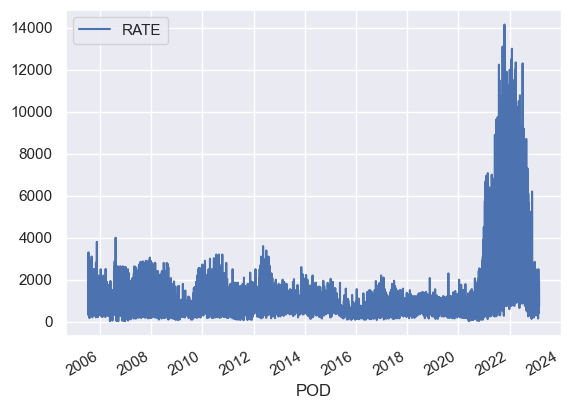

In [62]:
df4.plot(x='POD', y='RATE')
plt.show()

<h3>Casting All to INT32 Type</h3>

In [63]:
df4['CNTR_SIZE'] = df4['CNTR_SIZE'].astype(np.int32)
df4['RATE'] = df4['RATE'].astype(np.int32)
df4['PARTY_ID_EN'] = df4['PARTY_ID_EN'].astype(np.int32)
df4['ETA_ETD_NO'] = df4['ETA_ETD_NO'].astype(np.int32)
df4.info()
df4.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339 entries, 0 to 6338
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6339 non-null   datetime64[ns]
 1   RATE          6339 non-null   int32         
 2   COM_ID        6339 non-null   object        
 3   PARTY_ID      6339 non-null   object        
 4   PARTY_ID_EN   6339 non-null   int32         
 5   PARTY_NAME    6339 non-null   object        
 6   CSL_ID        6339 non-null   object        
 7   ETA_ETD_NO    6339 non-null   int32         
 8   ETD_POL_D     6339 non-null   object        
 9   POD_ID        6339 non-null   object        
 10  CNTR_ID       6339 non-null   object        
 11  CNTR_SIZE     6339 non-null   int32         
 12  CNTR_TYPE     6339 non-null   object        
 13  ENCODED_TYPE  6339 non-null   int32         
 14  POD_ID_EN     6339 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int3

,POD,RATE,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,CNTR_ID,CNTR_SIZE,CNTR_TYPE,ENCODED_TYPE,POD_ID_EN
0,2005-07-15,1710,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600224,20050715,NLRTM,ROTTERDAM,CTNR010050700354,40,HC NOR,4,3.241651e+09
1,2005-07-16,862,010,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,ECS01050600325,20050716,KRPUS,BUSAN,CTNR010050700379,20,GP,2,2.904902e+09
2,2005-07-17,315,010,01004649,1004649,M & P INTERNATIONAL CO LTD-HO CHI MINH,ECS010050700025,20050717,VNSGN,HOCHIMINH CITY ( TAN CANG ),CTNR010050700537,40,HC,1,2.072622e+09
3,2005-07-18,3300,010,01008144,1008144,TRANSLOGISTICS SA DE CV,ECS01050600497,20050718,MXZLO,"MANZANILLO , MEXICO",CTNR010050700510,40,GP,2,2.460062e+09
4,2005-07-19,850,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600140,20050719,NZAKL,AUCKLAND,CTNR010050700496,40,HC,1,2.397848e+09


<h4>Removing Dates from 2023 onwards as 2023 is used to test test the accuracy of the cost rate forecast.</h4>

In [64]:
# Filter out the rows with a date in 2023
df_before_2023 = df4[df4['POD'] < '2023-01-01'].reset_index(drop=True)
df_2023_and_after = df4[df4['POD'] >= '2023-01-01'].reset_index(drop=True)

In [65]:
df_before_2023.info()
df_before_2023.to_csv('CR_FC_PREP_0522.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6282 entries, 0 to 6281
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6282 non-null   datetime64[ns]
 1   RATE          6282 non-null   int32         
 2   COM_ID        6282 non-null   object        
 3   PARTY_ID      6282 non-null   object        
 4   PARTY_ID_EN   6282 non-null   int32         
 5   PARTY_NAME    6282 non-null   object        
 6   CSL_ID        6282 non-null   object        
 7   ETA_ETD_NO    6282 non-null   int32         
 8   ETD_POL_D     6282 non-null   object        
 9   POD_ID        6282 non-null   object        
 10  CNTR_ID       6282 non-null   object        
 11  CNTR_SIZE     6282 non-null   int32         
 12  CNTR_TYPE     6282 non-null   object        
 13  ENCODED_TYPE  6282 non-null   int32         
 14  POD_ID_EN     6282 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int3

In [66]:
df_2023_and_after.info()
df_2023_and_after.to_csv('CR_FC_PREP_23.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           57 non-null     datetime64[ns]
 1   RATE          57 non-null     int32         
 2   COM_ID        57 non-null     object        
 3   PARTY_ID      57 non-null     object        
 4   PARTY_ID_EN   57 non-null     int32         
 5   PARTY_NAME    57 non-null     object        
 6   CSL_ID        57 non-null     object        
 7   ETA_ETD_NO    57 non-null     int32         
 8   ETD_POL_D     57 non-null     object        
 9   POD_ID        57 non-null     object        
 10  CNTR_ID       57 non-null     object        
 11  CNTR_SIZE     57 non-null     int32         
 12  CNTR_TYPE     57 non-null     object        
 13  ENCODED_TYPE  57 non-null     int32         
 14  POD_ID_EN     57 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int32(5)

<ol>
    <li>There are total of 57 rows of data after and equal year 2023</li>
    <li>There are total of 6282 rows of data before year 2023</li>
<ol>
